<a href="https://colab.research.google.com/github/Rishit605/ML-Prediction-Models/blob/main/MultiVariete_TimeSeries_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using the VAR [VECTOR AUTORREGRRIVE MODEL]**

## **Importing Libraries**

In [ ]:
!pip install matplotlib mplcursors

In [ ]:
import pandas as pd
import munpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import mplcursors

from statsmodel.tsa.api import VAR

## **Loading the Dataset**

In [ ]:
df = pd.read_csv('...', parse_dates=[''])
df

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [ ]:
df.info()

## **Selecting the Time Range: Splitting the Dataset**

In [ ]:
start_date = '...'
end_date = '...'

mask = (df['date_time'] > start_date) & (df['date_time'] < end_date)
mask_test = (df['date_time'] > end_date)

In [ ]:
train_data = df.loc[mask].copy()
test_data = df.loc[mask_test].copy()

In [ ]:
train_data.set_index('date_time') # Setting the Date-Time column as Index.
test_data.set_index('date_time') # Setting the Date-Time column as Index.

## **Loading the Model**

In [ ]:
model = VAR(train_data)

lags = 5
model_fitted = model.fit(lags)

In [ ]:
forecast = model_fitted.forecast(train_data.values[-lags:], steps=len(test_data))

In [ ]:
columns = list(train_data.columns)
columns

In [ ]:
forecast_df = pd.DataFrame(forecast, columns=columns, index=test_data.index)
forecast_df

## **Visualization**

In [ ]:
# Prior to Prediction

ax = train_data.loc[(train_data.index > '2009-01-01 00:00:00') & (train_data.index < '2009-01-02 23:00:00')]['humidity'].plot(figsize=(15,5), title = 'Hourly Graph')
plt.legend(['Historical Data'])
plt.show()

In [ ]:
# After Prediction

# def plotfunc():
plt.figure(figsize=(10, 6))

# Train Data Plot
# plt.plot(train_data.index, train_data['cloudcover'], label='Train (cloudcover)')
# plt.plot(train_data.index, train_data['humidity'], label='Train (humidity)')
# plt.plot(train_data.index, train_data['precipMM'], label='Train (precipMM)')
# plt.plot(train_data.index, train_data['pressure'], label='Train (pressure)')
# plt.plot(train_data.index, train_data['tempC'], label='Train (tempC)')
# plt.plot(train_data.index, train_data['winddirDegree'], label='Train (winddirDegree)')
# plt.plot(train_data.index, train_data['windspeedKmph'], label='Train (windspeedKmph)')

# Test Data Plot
plt.plot(test_data.index, test_data['cloudcover'], label='Test (cloudcover)')
plt.plot(test_data.index, test_data['humidity'], label='Test (humidity)')
plt.plot(test_data.index, test_data['precipMM'], label='Test (precipMM)')
plt.plot(test_data.index, test_data['pressure'], label='Test (pressure)')
plt.plot(test_data.index, test_data['tempC'], label='Test (tempC)')
plt.plot(test_data.index, test_data['winddirDegree'], label='Test (winddirDegree)')
plt.plot(test_data.index, test_data['windspeedKmph'], label='Test (windspeedKmph)')

# Predictions
plt.plot(forecast_df.index, forecast_df['cloudcover'], label='Forecast (cloudcover)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['humidity'], label='Forecast (humidty)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['precipMM'], label='Forecast (precipMM)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['pressure'], label='Forecast (pressure)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['tempC'], label='Forecast (tempC)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['winddirDegree'], label='Forecast (winddirDegree)', linestyle='dashed')
plt.plot(forecast_df.index, forecast_df['windspeedKmph'], label='Forecast (windspeedKmph)', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Multivariate Time Series Forecasting with VAR')
plt.legend()
plt.show()

In [ ]:
# For Interactive Graphs

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a subplot with shared x-axis
fig = make_subplots(rows=7, cols=1, shared_xaxes=True, subplot_titles=[
    'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'winddirDegree', 'windspeedKmph'
])

# Train Data Plot
for col in train_data.columns:
    fig.add_trace(go.Scatter(x=train_data.index, y=train_data[col], mode='lines', name=f'Train ({col})'), row=train_data.columns.get_loc(col) + 1, col=1)

# Test Data Plot
for col in test_data.columns:
    fig.add_trace(go.Scatter(x=test_data.index, y=test_data[col], mode='lines', name=f'Test ({col})'), row=test_data.columns.get_loc(col) + 1, col=1)

# Forecast Data Plot
for col in forecast_df.columns:
    fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df[col], mode='lines', name=f'Forecast ({col})', line=dict(dash='dash')), row=forecast_df.columns.get_loc(col) + 1, col=1)

# Update layout
fig.update_layout(
    height=1200,
    title='Multivariate Time Series Forecasting with VAR',
    xaxis=dict(title='Date'),
    showlegend=True,
)

# Show the interactive plot
fig.show()


# **Using Custom CNN [LSTM] Model**

---
# Testing the LSTM multivariete

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv

--2023-08-14 15:38:14--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010492 (1.9M) [text/plain]
Saving to: ‘pollution.csv’

pollution.csv       100%[===================>]   1.92M  --.-KB/s    in 0.02s   

2023-08-14 15:38:14 (84.4 MB/s) - ‘pollution.csv’ saved [2010492/2010492]



In [ ]:
from datetime import datetime
import pandas as pd

def parse(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
df = pd.read_csv('/content/dataset/pollution.csv', parse_dates=[['year','month','day','hour']], index_col=0, date_parser=parse)
df.drop('No', axis=1, inplace=True)

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
df.columns=['pollution',  'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
df.index.name='date'

In [ ]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
df['pollution'].fillna(0, inplace=True)

In [ ]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
df = df[24:]
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
df2 = df.copy()

In [ ]:
df2

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


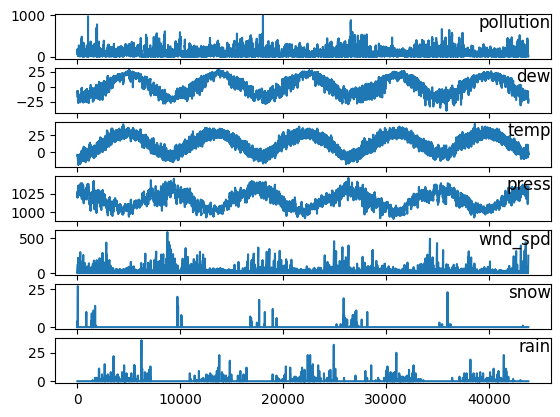

In [ ]:
from matplotlib import pyplot
# load dataset
values = df2.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(df2.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  n_vars = 1 if type(data) is list else data.shape[1]
  df = DataFrame(data)
  cols, names = list(), list()
  # input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

  # forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  # drop rows with NaN values
  if dropnan:
    agg.dropna(inplace=True)
  return agg

# load dataset
dataset = df2
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var7(t-1)  var8(t-1)   var1(t)
1   0.129779   0.352941   0.245902  ...   0.000000        0.0  0.148893
2   0.148893   0.367647   0.245902  ...   0.000000        0.0  0.159960
3   0.159960   0.426471   0.229508  ...   0.000000        0.0  0.182093
4   0.182093   0.485294   0.229508  ...   0.037037        0.0  0.138833
5   0.138833   0.485294   0.229508  ...   0.074074        0.0  0.109658

[5 rows x 9 columns]


In [ ]:
from numpy import concatenate
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
122/122 - 4s - loss: 0.0545 - val_loss: 0.0622 - 4s/epoch - 34ms/step
Epoch 2/50
122/122 - 1s - loss: 0.0373 - val_loss: 0.0650 - 1s/epoch - 8ms/step
Epoch 3/50
122/122 - 1s - loss: 0.0232 - val_loss: 0.0563 - 1s/epoch - 8ms/step
Epoch 4/50
122/122 - 2s - loss: 0.0179 - val_loss: 0.0487 - 2s/epoch - 13ms/step
Epoch 5/50
122/122 - 2s - loss: 0.0162 - val_loss: 0.0331 - 2s/epoch - 13ms/step
Epoch 6/50
122/122 - 2s - loss: 0.0153 - val_loss: 0.0239 - 2s/epoch - 13ms/step
Epoch 7/50
122/122 - 2s - loss: 0.0149 - val_loss: 0.0212 - 2s/epoch - 13ms/step
Epoch 8/50
122/122 - 1s - loss: 0.0149 - val_loss: 0.0190 - 991ms/epoch - 8ms/step
Epoch 9/50
122/122 - 2s - loss: 0.0148 - val_loss: 0.0166 - 2s/epoch - 13ms/step
Epoch 10/50
122/122 - 2s - loss: 0.0147 - val_loss: 0.0159 - 2s/epoch - 13ms/step
Epoch 11/50
122/122 - 2s - loss: 0.0147 - val_loss: 0.0155 - 2s/epoch - 13ms/step
Epoch 12/50
122/122 - 2s - loss: 0.0145 - val_loss: 0.0160 - 2s/epoch - 13ms/step
Epoch 13/50
122/122 - 2s 

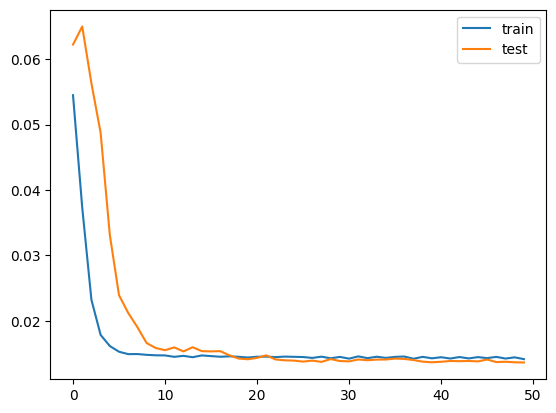

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

1095/1095 [==============================] - 2s 2ms/step


In [ ]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [ ]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
from numpy import sqrt

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.606


# **Probabilistic MultiVariate Time-Series Forecasting - HuggingFace**

In [1]:
from torch import nn
import math


def probsparse_attention(query_states, key_states, value_states, sampling_factor=5):
    """
    Compute the probsparse self-attention.
    Input shape: Batch x Time x Channel

    Note the additional `sampling_factor` input.
    """
    # get input sizes with logs
    L_K = key_states.size(1)
    L_Q = query_states.size(1)
    log_L_K = np.ceil(np.log1p(L_K)).astype("int").item()
    log_L_Q = np.ceil(np.log1p(L_Q)).astype("int").item()

    # calculate a subset of samples to slice from K and create Q_K_sample
    U_part = min(sampling_factor * L_Q * log_L_K, L_K)

    # create Q_K_sample (the q_i * k_j^T term in the sparsity measurement)
    index_sample = torch.randint(0, L_K, (U_part,))
    K_sample = key_states[:, index_sample, :]
    Q_K_sample = torch.bmm(query_states, K_sample.transpose(1, 2))

    # calculate the query sparsity measurement with Q_K_sample
    M = Q_K_sample.max(dim=-1)[0] - torch.div(Q_K_sample.sum(dim=-1), L_K)

    # calculate u to find the Top-u queries under the sparsity measurement
    u = min(sampling_factor * log_L_Q, L_Q)
    M_top = M.topk(u, sorted=False)[1]

    # calculate Q_reduce as query_states[:, M_top]
    dim_for_slice = torch.arange(query_states.size(0)).unsqueeze(-1)
    Q_reduce = query_states[dim_for_slice, M_top]  # size: c*log_L_Q x channel

    # and now, same as the canonical
    d_k = query_states.size(-1)
    attn_scores = torch.bmm(Q_reduce, key_states.transpose(-2, -1))  # Q_reduce x K^T
    attn_scores = attn_scores / math.sqrt(d_k)
    attn_probs = nn.functional.softmax(attn_scores, dim=-1)
    attn_output = torch.bmm(attn_probs, value_states)

    return attn_output, attn_scores


In [2]:
from torch import nn

# ConvLayer is a class with forward pass applying ELU and MaxPool1d
def informer_encoder_forward(x_input, num_encoder_layers=3, distil=True):
    # Initialize the convolution layers
    if distil:
        conv_layers = nn.ModuleList([ConvLayer() for _ in range(num_encoder_layers - 1)])
        conv_layers.append(None)
    else:
        conv_layers = [None] * num_encoder_layers

    # Apply conv_layer between each encoder_layer
    for encoder_layer, conv_layer in zip(encoder_layers, conv_layers):
        output = encoder_layer(x_input)
        if conv_layer is not None:
            output = conv_layer(loutput)

    return output


In [3]:
!pip install -q transformers datasets evaluate accelerate gluonts ujson

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from datasets import load_dataset

dataset = load_dataset("monash_tsf", "traffic_hourly")


Generating train split:   0%|          | 0/862 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/862 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/862 [00:00<?, ? examples/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 862
    })
    test: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 862
    })
    validation: Dataset({
        features: ['start', 'target', 'feat_static_cat', 'feat_dynamic_real', 'item_id'],
        num_rows: 862
    })
})

In [7]:
train_example = dataset["train"][0]
train_example.keys()

print(train_example["start"])
print(len(train_example["target"]))


2015-01-01 00:00:01
17448


In [8]:
validation_example = dataset["validation"][0]
validation_example.keys()

print(validation_example["start"])
print(len(validation_example["target"]))


2015-01-01 00:00:01
17496


In [9]:
freq = "1H"
prediction_length = 48

assert len(train_example["target"]) + prediction_length == len(
    dataset["validation"][0]["target"]
)


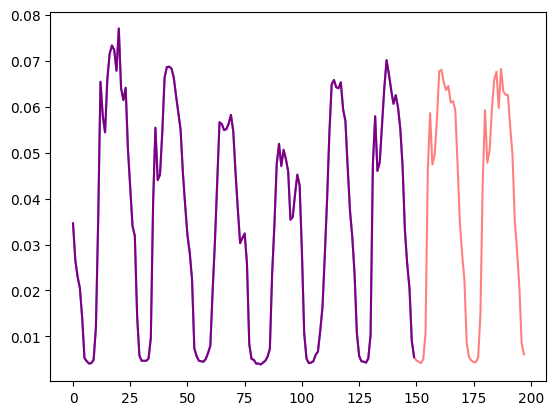

In [10]:
import matplotlib.pyplot as plt

num_of_samples = 150

figure, axes = plt.subplots()
axes.plot(train_example["target"][-num_of_samples:], color="blue")
axes.plot(
    validation_example["target"][-num_of_samples - prediction_length :],
    color="red",
    alpha=0.5,
)

plt.show()


In [11]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]


In [12]:
from functools import lru_cache

import pandas as pd
import numpy as np


@lru_cache(10_000)
def convert_to_pandas_period(date, freq):
    return pd.Period(date, freq)


def transform_start_field(batch, freq):
    batch["start"] = [convert_to_pandas_period(date, freq) for date in batch["start"]]
    return batch


In [13]:
from functools import partial

train_dataset.set_transform(partial(transform_start_field, freq=freq))
test_dataset.set_transform(partial(transform_start_field, freq=freq))


In [14]:
from gluonts.dataset.multivariate_grouper import MultivariateGrouper

num_of_variates = len(train_dataset)

train_grouper = MultivariateGrouper(max_target_dim=num_of_variates)
test_grouper = MultivariateGrouper(
    max_target_dim=num_of_variates,
    num_test_dates=len(test_dataset) // num_of_variates, # number of rolling test windows
)

multi_variate_train_dataset = train_grouper(train_dataset)
multi_variate_test_dataset = test_grouper(test_dataset)


In [21]:
multi_variate_train_example = multi_variate_train_dataset[0]
# print("multi_variate_train_example["target"].shape =", multi_variate_train_example["target"].shape)
multi_variate_train_example["target"].shape

(862, 17448)

In [22]:
from gluonts.time_feature import get_lags_for_frequency

lags_sequence = get_lags_for_frequency(freq)
print(lags_sequence)


[1, 2, 3, 4, 5, 6, 7, 23, 24, 25, 47, 48, 49, 71, 72, 73, 95, 96, 97, 119, 120, 121, 143, 144, 145, 167, 168, 169, 335, 336, 337, 503, 504, 505, 671, 672, 673, 719, 720, 721]


In [23]:
from gluonts.time_feature import time_features_from_frequency_str

time_features = time_features_from_frequency_str(freq)
print(time_features)


[<function hour_of_day at 0x7bda35d2a3b0>, <function day_of_week at 0x7bda35d2a320>, <function day_of_month at 0x7bda35d2a8c0>, <function day_of_year at 0x7bda35d2a290>]


In [24]:
from pandas.core.arrays.period import period_array

timestamp = pd.Period("2015-01-01 01:00:01", freq=freq)
timestamp_as_index = pd.PeriodIndex(data=period_array([timestamp]))
additional_features = [
    (time_feature.__name__, time_feature(timestamp_as_index))
    for time_feature in time_features
]
print(dict(additional_features))


{'hour_of_day': array([-0.45652174]), 'day_of_week': array([0.]), 'day_of_month': array([-0.5]), 'day_of_year': array([-0.5])}


In [25]:
from transformers import InformerConfig, InformerForPrediction

config = InformerConfig(
    # in the multivariate setting, input_size is the number of variates in the time series per time step
    input_size=num_of_variates,
    # prediction length:
    prediction_length=prediction_length,
    # context length:
    context_length=prediction_length * 2,
    # lags value copied from 1 week before:
    lags_sequence=[1, 24 * 7],
    # we'll add 5 time features ("hour_of_day", ..., and "age"):
    num_time_features=len(time_features) + 1,

    # informer params:
    dropout=0.1,
    encoder_layers=6,
    decoder_layers=4,
    # project input from num_of_variates*len(lags_sequence)+num_time_features to:
    d_model=64,
)

model = InformerForPrediction(config)


In [26]:
model.config.distribution_output


'student_t'

In [27]:
from gluonts.time_feature import TimeFeature
from gluonts.dataset.field_names import FieldName
from gluonts.transform import (
    AddAgeFeature,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AsNumpyArray,
    Chain,
    ExpectedNumInstanceSampler,
    InstanceSplitter,
    RemoveFields,
    SelectFields,
    SetField,
    TestSplitSampler,
    Transformation,
    ValidationSplitSampler,
    VstackFeatures,
    RenameFields,
)


In [28]:
from transformers import PretrainedConfig


def create_transformation(freq: str, config: PretrainedConfig) -> Transformation:
    # create list of fields to remove later
    remove_field_names = []
    if config.num_static_real_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_REAL)
    if config.num_dynamic_real_features == 0:
        remove_field_names.append(FieldName.FEAT_DYNAMIC_REAL)
    if config.num_static_categorical_features == 0:
        remove_field_names.append(FieldName.FEAT_STATIC_CAT)

    return Chain(
        # step 1: remove static/dynamic fields if not specified
        [RemoveFields(field_names=remove_field_names)]
        # step 2: convert the data to NumPy (potentially not needed)
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_CAT,
                    expected_ndim=1,
                    dtype=int,
                )
            ]
            if config.num_static_categorical_features > 0
            else []
        )
        + (
            [
                AsNumpyArray(
                    field=FieldName.FEAT_STATIC_REAL,
                    expected_ndim=1,
                )
            ]
            if config.num_static_real_features > 0
            else []
        )
        + [
            AsNumpyArray(
                field=FieldName.TARGET,
                # we expect an extra dim for the multivariate case:
                expected_ndim=1 if config.input_size == 1 else 2,
            ),
            # step 3: handle the NaN's by filling in the target with zero
            # and return the mask (which is in the observed values)
            # true for observed values, false for nan's
            # the decoder uses this mask (no loss is incurred for unobserved values)
            # see loss_weights inside the xxxForPrediction model
            AddObservedValuesIndicator(
                target_field=FieldName.TARGET,
                output_field=FieldName.OBSERVED_VALUES,
            ),
            # step 4: add temporal features based on freq of the dataset
            # these serve as positional encodings
            AddTimeFeatures(
                start_field=FieldName.START,
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_TIME,
                time_features=time_features_from_frequency_str(freq),
                pred_length=config.prediction_length,
            ),
            # step 5: add another temporal feature (just a single number)
            # tells the model where in the life the value of the time series is
            # sort of running counter
            AddAgeFeature(
                target_field=FieldName.TARGET,
                output_field=FieldName.FEAT_AGE,
                pred_length=config.prediction_length,
                log_scale=True,
            ),
            # step 6: vertically stack all the temporal features into the key FEAT_TIME
            VstackFeatures(
                output_field=FieldName.FEAT_TIME,
                input_fields=[FieldName.FEAT_TIME, FieldName.FEAT_AGE]
                + (
                    [FieldName.FEAT_DYNAMIC_REAL]
                    if config.num_dynamic_real_features > 0
                    else []
                ),
            ),
            # step 7: rename to match HuggingFace names
            RenameFields(
                mapping={
                    FieldName.FEAT_STATIC_CAT: "static_categorical_features",
                    FieldName.FEAT_STATIC_REAL: "static_real_features",
                    FieldName.FEAT_TIME: "time_features",
                    FieldName.TARGET: "values",
                    FieldName.OBSERVED_VALUES: "observed_mask",
                }
            ),
        ]
    )


In [29]:
from gluonts.transform.sampler import InstanceSampler
from typing import Optional


def create_instance_splitter(
    config: PretrainedConfig,
    mode: str,
    train_sampler: Optional[InstanceSampler] = None,
    validation_sampler: Optional[InstanceSampler] = None,
) -> Transformation:
    assert mode in ["train", "validation", "test"]

    instance_sampler = {
        "train": train_sampler
        or ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=config.prediction_length
        ),
        "validation": validation_sampler
        or ValidationSplitSampler(min_future=config.prediction_length),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field="values",
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=config.context_length + max(config.lags_sequence),
        future_length=config.prediction_length,
        time_series_fields=["time_features", "observed_mask"],
    )


In [30]:
from typing import Iterable

import torch
from gluonts.itertools import Cached, Cyclic
from gluonts.dataset.loader import as_stacked_batches


def create_train_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    num_batches_per_epoch: int,
    shuffle_buffer_length: Optional[int] = None,
    cache_data: bool = True,
    **kwargs,
) -> Iterable:
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
        "future_values",
        "future_observed_mask",
    ]

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=True)
    if cache_data:
        transformed_data = Cached(transformed_data)

    # we initialize a Training instance
    instance_splitter = create_instance_splitter(config, "train")

    # the instance splitter will sample a window of
    # context length + lags + prediction length (from all the possible transformed time series, 1 in our case)
    # randomly from within the target time series and return an iterator.
    stream = Cyclic(transformed_data).stream()
    training_instances = instance_splitter.apply(
        stream, is_train=True
    )

    return as_stacked_batches(
        training_instances,
        batch_size=batch_size,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=num_batches_per_epoch,
    )


In [31]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # we create a Test Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "test")

    # we apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [32]:
def create_test_dataloader(
    config: PretrainedConfig,
    freq,
    data,
    batch_size: int,
    **kwargs,
):
    PREDICTION_INPUT_NAMES = [
        "past_time_features",
        "past_values",
        "past_observed_mask",
        "future_time_features",
    ]
    if config.num_static_categorical_features > 0:
        PREDICTION_INPUT_NAMES.append("static_categorical_features")

    if config.num_static_real_features > 0:
        PREDICTION_INPUT_NAMES.append("static_real_features")

    transformation = create_transformation(freq, config)
    transformed_data = transformation.apply(data, is_train=False)

    # we create a Test Instance splitter which will sample the very last
    # context window seen during training only for the encoder.
    instance_sampler = create_instance_splitter(config, "test")

    # we apply the transformations in test mode
    testing_instances = instance_sampler.apply(transformed_data, is_train=False)

    return as_stacked_batches(
        testing_instances,
        batch_size=batch_size,
        output_type=torch.tensor,
        field_names=PREDICTION_INPUT_NAMES,
    )


In [33]:
train_dataloader = create_train_dataloader(
    config=config,
    freq=freq,
    data=multi_variate_train_dataset,
    batch_size=256,
    num_batches_per_epoch=100,
    num_workers=2,
)

test_dataloader = create_test_dataloader(
    config=config,
    freq=freq,
    data=multi_variate_test_dataset,
    batch_size=32,
)


In [34]:
batch = next(iter(train_dataloader))
for k, v in batch.items():
    print(k, v.shape, v.type())


past_time_features torch.Size([256, 264, 5]) torch.FloatTensor
past_values torch.Size([256, 264, 862]) torch.FloatTensor
past_observed_mask torch.Size([256, 264, 862]) torch.FloatTensor
future_time_features torch.Size([256, 48, 5]) torch.FloatTensor
future_values torch.Size([256, 48, 862]) torch.FloatTensor
future_observed_mask torch.Size([256, 48, 862]) torch.FloatTensor


In [35]:
# perform forward pass
outputs = model(
    past_values=batch["past_values"],
    past_time_features=batch["past_time_features"],
    past_observed_mask=batch["past_observed_mask"],
    static_categorical_features=batch["static_categorical_features"]
    if config.num_static_categorical_features > 0
    else None,
    static_real_features=batch["static_real_features"]
    if config.num_static_real_features > 0
    else None,
    future_values=batch["future_values"],
    future_time_features=batch["future_time_features"],
    future_observed_mask=batch["future_observed_mask"],
    output_hidden_states=True,
)


In [36]:
print("Loss:", outputs.loss.item())


Loss: -1071.0050048828125


In [37]:
from accelerate import Accelerator
from torch.optim import AdamW

epochs = 25
loss_history = []

accelerator = Accelerator()
device = accelerator.device

model.to(device)
optimizer = AdamW(model.parameters(), lr=6e-4, betas=(0.9, 0.95), weight_decay=1e-1)

model, optimizer, train_dataloader = accelerator.prepare(
    model,
    optimizer,
    train_dataloader,
)

model.train()
for epoch in range(epochs):
    for idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()
        outputs = model(
            static_categorical_features=batch["static_categorical_features"].to(device)
            if config.num_static_categorical_features > 0
            else None,
            static_real_features=batch["static_real_features"].to(device)
            if config.num_static_real_features > 0
            else None,
            past_time_features=batch["past_time_features"].to(device),
            past_values=batch["past_values"].to(device),
            future_time_features=batch["future_time_features"].to(device),
            future_values=batch["future_values"].to(device),
            past_observed_mask=batch["past_observed_mask"].to(device),
            future_observed_mask=batch["future_observed_mask"].to(device),
        )
        loss = outputs.loss

        # Backpropagation
        accelerator.backward(loss)
        optimizer.step()

        loss_history.append(loss.item())
        if idx % 100 == 0:
            print(loss.item())

-1054.974609375
-2179.441162109375
-2365.256103515625
-2530.730712890625
-2533.6806640625
-2664.437744140625
-2627.460205078125
-2636.87841796875
-2697.822509765625
-2741.041748046875
-2700.4248046875
-2759.762939453125
-2740.6328125
-2783.747314453125
-2790.839599609375
-2764.760009765625
-2821.988037109375
-2845.760498046875
-2796.1787109375
-2864.060791015625
-2843.177734375
-2883.9482421875
-2883.568359375
-2857.244140625
-2770.8486328125


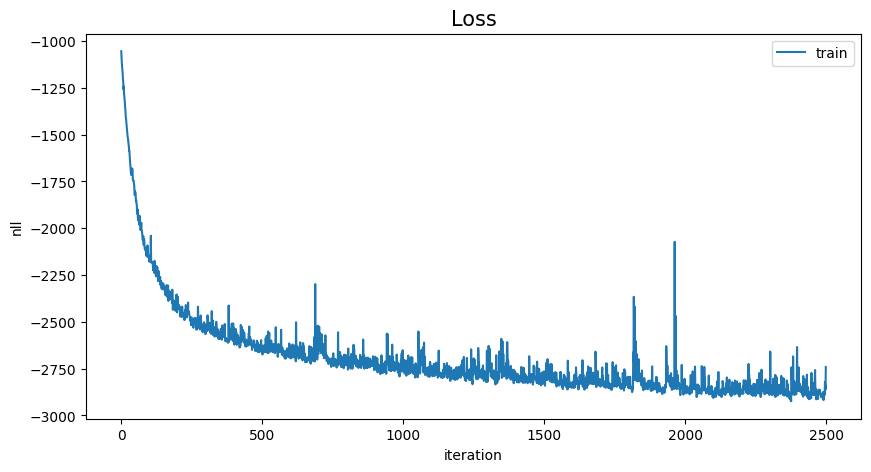

In [38]:
# view training
loss_history = np.array(loss_history).reshape(-1)
x = range(loss_history.shape[0])
plt.figure(figsize=(10, 5))
plt.plot(x, loss_history, label="train")
plt.title("Loss", fontsize=15)
plt.legend(loc="upper right")
plt.xlabel("iteration")
plt.ylabel("nll")
plt.show()


In [39]:
model.eval()

forecasts_ = []

for batch in test_dataloader:
    outputs = model.generate(
        static_categorical_features=batch["static_categorical_features"].to(device)
        if config.num_static_categorical_features > 0
        else None,
        static_real_features=batch["static_real_features"].to(device)
        if config.num_static_real_features > 0
        else None,
        past_time_features=batch["past_time_features"].to(device),
        past_values=batch["past_values"].to(device),
        future_time_features=batch["future_time_features"].to(device),
        past_observed_mask=batch["past_observed_mask"].to(device),
    )
    forecasts_.append(outputs.sequences.cpu().numpy())


In [40]:
forecasts_[0].shape


(1, 100, 48, 862)

In [41]:
forecasts = np.vstack(forecasts_)
print(forecasts.shape)


(1, 100, 48, 862)


In [42]:
from evaluate import load
from gluonts.time_feature import get_seasonality

mase_metric = load("evaluate-metric/mase")
smape_metric = load("evaluate-metric/smape")

forecast_median = np.median(forecasts, 1).squeeze(0).T

mase_metrics = []
smape_metrics = []

for item_id, ts in enumerate(test_dataset):
    training_data = ts["target"][:-prediction_length]
    ground_truth = ts["target"][-prediction_length:]
    mase = mase_metric.compute(
        predictions=forecast_median[item_id],
        references=np.array(ground_truth),
        training=np.array(training_data),
        periodicity=get_seasonality(freq),
    )
    mase_metrics.append(mase["mase"])

    smape = smape_metric.compute(
        predictions=forecast_median[item_id],
        references=np.array(ground_truth),
    )
    smape_metrics.append(smape["smape"])


In [43]:
print(f"MASE: {np.mean(mase_metrics)}")

print(f"sMAPE: {np.mean(smape_metrics)}")

MASE: 1.3400766808751563
sMAPE: 0.6079440121030547


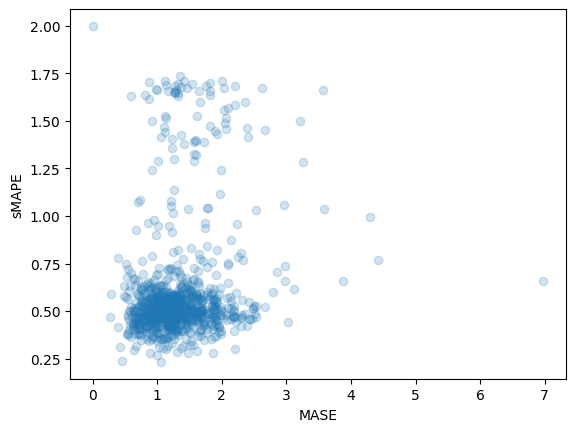

In [44]:
plt.scatter(mase_metrics, smape_metrics, alpha=0.2)
plt.xlabel("MASE")
plt.ylabel("sMAPE")
plt.show()


In [45]:
import matplotlib.dates as mdates


def plot(ts_index, mv_index):
    fig, ax = plt.subplots()

    index = pd.period_range(
        start=multi_variate_test_dataset[ts_index][FieldName.START],
        periods=len(multi_variate_test_dataset[ts_index][FieldName.TARGET]),
        freq=multi_variate_test_dataset[ts_index][FieldName.START].freq,
    ).to_timestamp()

    ax.xaxis.set_minor_locator(mdates.HourLocator())

    ax.plot(
        index[-2 * prediction_length :],
        multi_variate_test_dataset[ts_index]["target"][mv_index, -2 * prediction_length :],
        label="actual",
    )

    ax.plot(
        index[-prediction_length:],
        forecasts[ts_index, ..., mv_index].mean(axis=0),
        label="mean",
    )
    ax.fill_between(
        index[-prediction_length:],
        forecasts[ts_index, ..., mv_index].mean(0)
        - forecasts[ts_index, ..., mv_index].std(axis=0),
        forecasts[ts_index, ..., mv_index].mean(0)
        + forecasts[ts_index, ..., mv_index].std(axis=0),
        alpha=0.2,
        interpolate=True,
        label="+/- 1-std",
    )
    ax.legend()
    fig.autofmt_xdate()


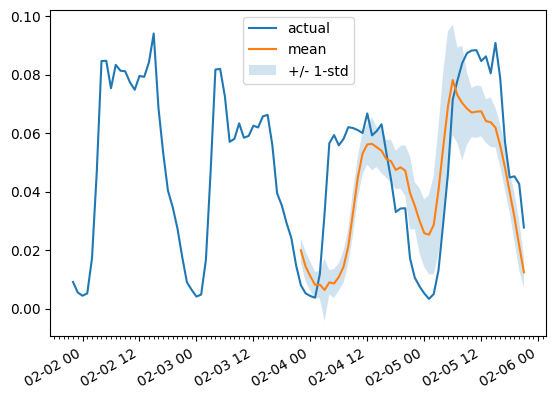

In [46]:
plot(0, 344)


# **MultiStep Tensorflow Time-Series Forecasting**

## Importing Librarires

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir dataset
%cd dataset

!kaggle datasets download -d hiteshsoneji/historical-weather-data-for-indian-cities

/content/dataset
 85% 10.0M/11.8M [00:00<00:00, 16.6MB/s]
100% 11.8M/11.8M [00:00<00:00, 13.5MB/s]


In [ ]:
!unzip /content/dataset/historical-weather-data-for-indian-cities.zip

Archive:  /content/dataset/historical-weather-data-for-indian-cities.zip
  inflating: bengaluru.csv           
  inflating: bombay.csv              
  inflating: delhi.csv               
  inflating: hyderabad.csv           
  inflating: jaipur.csv              
  inflating: kanpur.csv              
  inflating: nagpur.csv              
  inflating: pune.csv                


In [ ]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21048 sha256=bcd9d446302d4b632c0fc3618dff0bb279454ec914b6d4f732b1510f326b6d1c
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as  plt
import plotly
import mplcursors

from statsmodels.tsa.api import VAR

In [ ]:
df = pd.read_csv('/content/dataset/pune.csv', parse_dates=['date_time'])
df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,07:07 AM,06:09 PM,7,18,18,18,7,0,50,0.0,1013,13,10,59,3
1,2009-01-01 01:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,07:07 AM,06:09 PM,6,18,18,18,9,0,47,0.0,1013,14,10,57,4
2,2009-01-01 02:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,07:07 AM,06:09 PM,6,18,18,18,10,0,44,0.0,1013,14,10,55,5
3,2009-01-01 03:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,07:07 AM,06:09 PM,5,18,18,18,12,0,41,0.0,1013,15,10,54,6
4,2009-01-01 04:00:00,31,13,0.0,11.0,6,1,31,10:17 AM,10:16 PM,07:07 AM,06:09 PM,5,20,20,20,11,1,38,0.0,1014,16,10,68,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,07:07 AM,06:09 PM,11,24,24,23,20,3,49,0.0,1014,23,10,255,12
96428,2020-01-01 20:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,07:07 AM,06:09 PM,12,22,23,22,19,3,53,0.0,1014,22,10,258,11
96429,2020-01-01 21:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,07:07 AM,06:09 PM,12,21,23,21,18,2,57,0.0,1015,21,10,262,10
96430,2020-01-01 22:00:00,29,18,0.0,11.0,6,1,37,11:34 AM,11:32 PM,07:07 AM,06:09 PM,12,20,22,20,17,2,60,0.0,1015,20,10,264,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96432 entries, 0 to 96431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          96432 non-null  datetime64[ns]
 1   maxtempC           96432 non-null  int64         
 2   mintempC           96432 non-null  int64         
 3   totalSnow_cm       96432 non-null  float64       
 4   sunHour            96432 non-null  float64       
 5   uvIndex            96432 non-null  int64         
 6   uvIndex.1          96432 non-null  int64         
 7   moon_illumination  96432 non-null  int64         
 8   moonrise           96432 non-null  object        
 9   moonset            96432 non-null  object        
 10  sunrise            96432 non-null  object        
 11  sunset             96432 non-null  object        
 12  DewPointC          96432 non-null  int64         
 13  FeelsLikeC         96432 non-null  int64         
 14  HeatIn

In [ ]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [ ]:
df.drop(columns=['totalSnow_cm', 'sunHour',
                'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
                'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
                'WindChillC', 'WindGustKmph']
        , inplace=True)

In [ ]:
df

,date_time,maxtempC,mintempC,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,31,13,0,50,0.0,1013,13,10,59,3
1,2009-01-01 01:00:00,31,13,0,47,0.0,1013,14,10,57,4
2,2009-01-01 02:00:00,31,13,0,44,0.0,1013,14,10,55,5
3,2009-01-01 03:00:00,31,13,0,41,0.0,1013,15,10,54,6
4,2009-01-01 04:00:00,31,13,1,38,0.0,1014,16,10,68,6
...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,29,18,3,49,0.0,1014,23,10,255,12
96428,2020-01-01 20:00:00,29,18,3,53,0.0,1014,22,10,258,11
96429,2020-01-01 21:00:00,29,18,2,57,0.0,1015,21,10,262,10
96430,2020-01-01 22:00:00,29,18,2,60,0.0,1015,20,10,264,9
